In [1]:
#Dependancies
import requests
import pandas as pd
import json
from config import college_scorecard_api_key
import csv
import matplotlib.pyplot as plt
from scipy import stats



In [2]:
# Call in 2017 'College Scorecard (i.e. csc)' API ; only schools that offer a bachelor's or graduate degree
year = "2017"
csc_url = "https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.highest=3,4&"

csc_2017_query_url = f'{csc_url}api_key={college_scorecard_api_key}&_fields=id,school.name,school.city,school.state_fips,school.zip,location.lat,location.lon,{year}'
csc_2017_response = requests.get(csc_2017_query_url).json()

# Identify JSON page number
page_num = csc_2017_response['metadata']['page']
csc_json_data = []

# Loop through each JSON page and extract JSON data into a list
for page in range(0, 29):
    csc_2017_response = requests.get(csc_2017_query_url, params={'page': page, 'per_page': 100}).json()
    csc_json_data.append(csc_2017_response['results'])
    csc_data_list = []
    for csc_data in csc_json_data:
        for csc_objects in csc_data:
            csc_data_list.append(csc_objects)

# Convert JSON list into a Dataframe
csc_data_frame = pd.DataFrame(csc_data_list)

In [3]:
# Pull columns needed
csc_data_table_pull = csc_data_frame[['school.name',
                                     'school.city',
                                     'school.state_fips',
                                     'location.lat',
                                     'location.lon',
                                     '2017.student.size',
                                     '2017.cost.attendance.academic_year',
                                     '2017.cost.tuition.in_state',
                                     '2017.cost.tuition.out_of_state',
                                     '2017.student.retention_rate.four_year.full_time',
                                     '2017.aid.federal_loan_rate',
                                     '2017.aid.loan_principal',
                                     '2017.aid.median_debt.completers.overall',
                                     '2017.aid.median_debt.income.0_30000',
                                     '2017.aid.median_debt.income.30001_75000',
                                     '2017.aid.median_debt.income.greater_than_75000',
                                     '2017.aid.median_debt.female_students',
                                     '2017.aid.median_debt.male_students',
                                     '2017.completion.rate_suppressed.overall']].dropna().reset_index(drop=True)

# Clean column headers
csc_data_table_header_clean = csc_data_table_pull.rename(columns = {'school.name': 'School Name',
                                                              'school.city': 'City',
                                                              'school.state_fips': 'State Code',
                                                              'location.lat': 'Latitude',
                                                              'location.lon': 'Longitude',
                                                              '2017.student.size': 'Student Size',
                                                              '2017.cost.attendance.academic_year': 'Cost of Attendance',
                                                              '2017.cost.tuition.in_state': 'In-State Tuition',
                                                              '2017.cost.tuition.out_of_state': 'Out-of-State Tuition',
                                                              '2017.student.retention_rate.four_year.full_time': 'Retention Rate: Fulltime Student',
                                                              '2017.aid.federal_loan_rate': '% of Undergrad Students Recieving Fed Student Loan',
                                                              '2017.aid.loan_principal': 'Median Loan Principal',
                                                              '2017.aid.median_debt.completers.overall': 'Median Debt',
                                                              '2017.aid.median_debt.income.0_30000': 'Median Debt with income between 0-30k',
                                                              '2017.aid.median_debt.income.30001_75000': 'Median Debt with income between 30,001-75k',
                                                              '2017.aid.median_debt.income.greater_than_75000': 'Median Debt with income greater than 75k',
                                                              '2017.aid.median_debt.female_students': 'Median Debt for Female Students',
                                                              '2017.aid.median_debt.male_students': 'Median Debt for Male Students',
                                                              '2017.completion.rate_suppressed.overall': 'Completion Rate'})


In [4]:
# Pull in and merge State names.

fips_path = "Resources/State FIPS Codes.csv"
fips_states_df = pd.read_csv(fips_path)

csc_data_final = pd.merge(csc_data_table_header_clean, fips_states_df, on='State Code')
csc_data_final.tail()

,School Name,City,State Code,Latitude,Longitude,Student Size,Cost of Attendance,In-State Tuition,Out-of-State Tuition,Retention Rate: Fulltime Student,...,Median Loan Principal,Median Debt,Median Debt with income between 0-30k,"Median Debt with income between 30,001-75k",Median Debt with income greater than 75k,Median Debt for Female Students,Median Debt for Male Students,Completion Rate,State Name,State Abbrev
1743,Johnson & Wales University-Providence,Providence,44,41.819956,-71.412770,7500.0,45897.0,31508.0,31508.0,0.7552,...,15250.0,24500.0,13823.0,16000.0,16000.0,15834.0,14816.0,0.6252,Rhode Island,RI
1744,Providence College,Providence,44,41.842742,-71.437446,4011.0,62455.0,48764.0,48764.0,0.9195,...,27000.0,27000.0,26000.0,27000.0,27000.0,27000.0,27000.0,0.8373,Rhode Island,RI
1745,Roger Williams University,Bristol,44,41.650214,-71.260374,4476.0,50369.0,33336.0,33336.0,0.7936,...,19500.0,26798.0,18326.0,19000.0,19500.0,19500.0,19090.0,0.6422,Rhode Island,RI
1746,University of Rhode Island,Kingston,44,41.484691,-71.527356,14008.0,27834.0,13792.0,30042.0,0.8479,...,18500.0,23000.0,17500.0,18500.0,18750.0,18500.0,17750.0,0.6427,Rhode Island,RI
1747,University of Wyoming,Laramie,56,41.311773,-105.579310,9623.0,19615.0,5217.0,16827.0,0.7830,...,12500.0,18498.0,12500.0,12390.0,12000.0,12500.0,12000.0,0.5683,Wyoming,WY


### Henock's Code - Start

### Henock's Code - End

----------------------------------------------

### JJ's Code - Start

### JJ's Code - End

----------------------------------------------

### Ana's Code - Start

According to the latest student loan debt statistics, student loan debt is now the second highest consumer debt category - second only to mortgages and higher than credit card debt. There are more than 44 million borrowers who collectively owe 1.6 trillion in student loan debt. We took a look at how that debt is geographically distributed across the US. The Department of Education's Office for Federal Student Aid publishes quarterly student debt totals and the number of borrowers for each state. Using that data, we found the total student-debt median in each state, along with the median per gender of barrowers.

In [5]:
plt.close()

## Which is the gender distribution of median Debt comparing with the total median Debt?

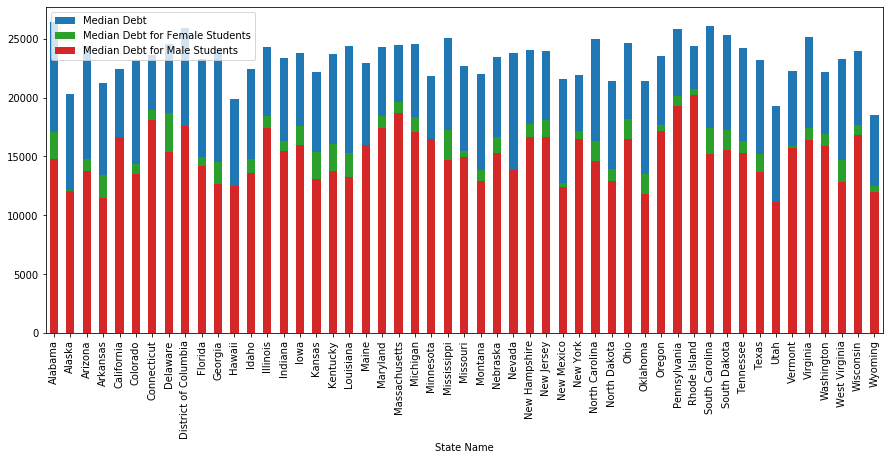

<Figure size 432x288 with 0 Axes>

In [6]:
#Read the columns we need for building a plot
csc_data_finaly =pd.DataFrame(csc_data_final.groupby(['State Name'])['Median Debt', 'Median Debt for Female Students', 'Median Debt for Male Students' ].mean())
csc_data_finaly =csc_data_finaly.reset_index()

#plot
ax = csc_data_finaly.plot(x="State Name", y="Median Debt", kind="bar",figsize=(15,6))
csc_data_finaly.plot(x="State Name", y="Median Debt for Female Students", kind="bar", ax=ax, color="C2")
csc_data_finaly.plot(x="State Name", y="Median Debt for Male Students", kind="bar", ax=ax, color="C3")

plt.show()
plt.savefig('outputs/MedianFemalMale.png')

 This plot is showing that nationally there are more women with debt than men. Also, we can see the total Median Debt by state.  In 52 states, the average debt is more than $20,000 bilion . Alabama residents owe 26.7 billion dollars in student loan debt on avarage. Alaska residents, for example, owe less than 20 billion in student loan debt on avarage.


In [7]:
plt.close()

In [8]:
plt.close()

# What is the T-test for the mean of ONE group for 'Median Debd'?
### The Ho is : The population and the sample of the population have equal avarages of Median Debd

In [9]:

# Generate some data to test with
def gendata(loc=0):
    population = csc_data_final['Median Debt']
    sample = population.sample(frac =.25) 
    
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

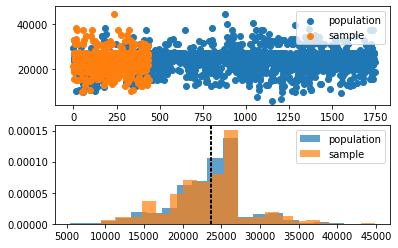

In [10]:
# Generate some data and show the scatter plot
population, sample = gendata()
#plt.show()
plt.savefig('outputs/T-test1.png')

In [11]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-0.5617620947166232, pvalue=0.5745667713425937)

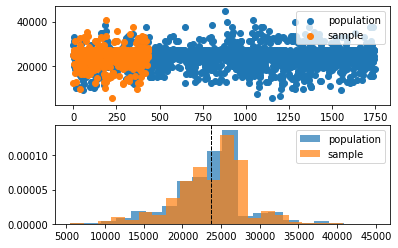

In [12]:
# Generate data with a bigger difference in means
population, sample = gendata(loc=10000)
plt.savefig('outputs/T-test2.png')

In [13]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=0.19308781623992627, pvalue=0.846980107145351)

#### This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean. p_value> 0.05. We fail to reject the null hypothesis.

In [14]:
plt.close()

In [15]:
plt.close()

# Which is the distribution of student Debt by Age and Location?

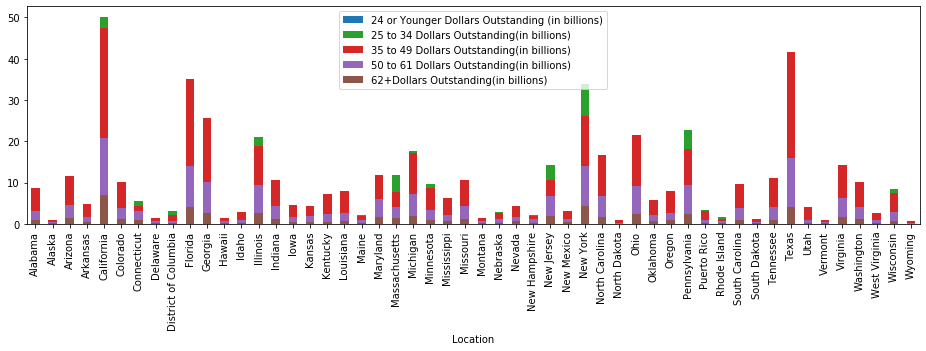

<Figure size 432x288 with 0 Axes>

In [16]:
#Portfolio-by-Location-by-Age
data5_df = pd.read_csv("Resources/Portfolio-by-Location-by-Age.csv")
data5_df.rename(columns = {' ' : 'Location',
                              '24 - Younger':'24 or Younger Dollars Outstanding (in billions)',
                              'Unnamed: 2':'24 or Younger Barrowers(#)(in millions)',
                              '25 -34' :'25 to 34 Dollars Outstanding(in billions)',
                              'Unnamed: 4' :'25 to 34 Barrowers(#)(in millions)',
                              '35 - 49' :'35 to 49 Dollars Outstanding(in billions)',
                              'Unnamed: 6' :'35 to 49 Barrowers(#)(in millions)',
                              '50 -61' :'50 to 61 Dollars Outstanding(in billions)',
                              'Unnamed: 8' :'50 to 61 Barrowers(#)(in millions)',
                              '62 - Older' :'62+Dollars Outstanding(in billions)',
                              'Unnamed: 10' :'62+Barrowers(#)(in millions)'
                              }, inplace = True)
data5_df = data5_df.drop(data5_df.index[0])
data5_df = data5_df.drop(data5_df.index[53])
data = list(data5_df.columns.values)
#print(data[1:])
data5_df[data[1:]]
data5_df[data[1:]] = data5_df[data[1:]].replace('[\$,]','', regex=True).astype(float)
data5_df = data5_df.drop(data5_df.index[52])
data5_df.tail()
ax = data5_df.plot(x="Location", y="24 or Younger Dollars Outstanding (in billions)", kind="bar",figsize=(16,4))
data5_df.plot(x="Location", y="25 to 34 Dollars Outstanding(in billions)", kind="bar", ax=ax, color="C2")
data5_df.plot(x="Location", y="35 to 49 Dollars Outstanding(in billions)", kind="bar", ax=ax, color="C3")
data5_df.plot(x="Location", y="50 to 61 Dollars Outstanding(in billions)", kind="bar", ax=ax, color="C4")
data5_df.plot(x="Location", y="62+Dollars Outstanding(in billions)", kind="bar", ax=ax, color="C5")

plt.show()
plt.savefig('outputs/DollarsOutstandindByAgeLocation.png')

Rounding out the five states with the most student debt in total are California, Texas, New York, Florida, and Georgia, in that order. On the flip side, Wyoming has the least debt in total ($3,610), which is 33.0 lower than the national average. Hawaii follows right behind at ($3,780), and 29.9% below the national average.

In [17]:
plt.close()

In [18]:
plt.close()

In [19]:
data1_df = pd.read_csv("Resources/5StatesData.csv")
data1_df = data1_df.dropna()
data1_df.tail()

,Name,Year,Average debt of graduates,Percent of graduates with debt,Per capita debt of graduates,Average debt of graduates in federal loans,Percent of graduates borrowing federal loans,Per capita federal debt of graduates,"Federal debt of graduates, as percent of total debt",Per capita nonfederal debt of graduates,"Nonfederal debt of graduates, as percent of total debt"
70,Rhode Island - Total,2011-12,30483.0,0.69,21001.0,21383.0,0.67,14334.0,0.68,6667.0,0.32
71,Rhode Island - Total,2010-11,29097.0,0.69,20195.0,20544.0,0.67,13801.0,0.68,6394.0,0.32
72,Rhode Island - Total,2009-10,26340.0,0.67,17587.0,19447.0,0.63,12345.0,0.70,5242.0,0.30
73,Rhode Island - Total,2008-09,26573.0,0.65,17404.0,18437.0,0.63,11655.0,0.67,5749.0,0.33
74,Rhode Island - Total,2007-08,25831.0,0.71,18231.0,18079.0,0.68,12317.0,0.68,5914.0,0.32


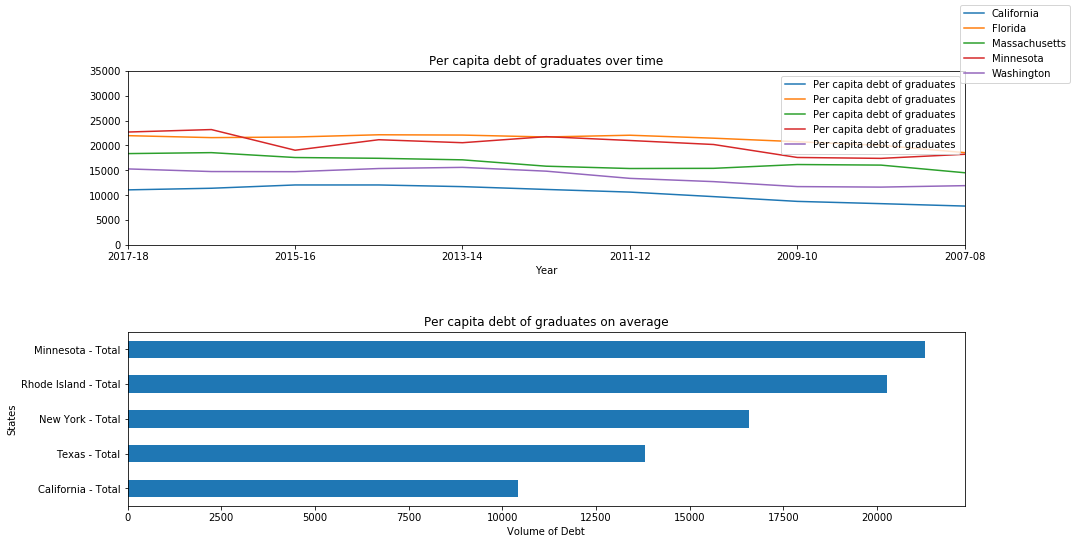

In [20]:
#Per capita debt of graduates over time
fig = plt.figure()
# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)
# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

#Line plot 
data1_df.groupby('Name').plot(x='Year', y='Per capita debt of graduates', ax=ax1, figsize= (15,8))
ax1.set_ylim((0,35000))
ax1.xaxis.set_label_text("Year")
ax1.set_title("Per capita debt of graduates over time")
fig.legend(['California', 'Florida', 'Massachusetts','Minnesota','Washington'],
           loc='upper right')


#Bar Plot
data1_df.groupby('Name')['Per capita debt of graduates'].mean().sort_values().plot(kind='barh', ax=ax2, figsize=(15,8))
ax2.yaxis.set_label_text("States")
ax2.xaxis.set_label_text("Volume of Debt")
ax2.set_title("Per capita debt of graduates on average")
fig.subplots_adjust(hspace=0.5)
plt.savefig('outputs/PerCapitaDebt.png')

Rounding out the states with  student debt per capita, we find that Minnesota is among leaders.
Interestingly, a growing population on the West Coast helps to lower the debt burden for states like California, even despite the strong presence of prestigious schools. Home to Stanford, USC, UCLA, CalTech, and more, the Golden State surprisingly has only around $10,000 bilions in debt per capita.

In [21]:
plt.close()

0       32163.899433
1       19555.992589
2       28165.692503
3       19431.941546
4       16794.114593
            ...     
1743    34187.046498
1744    45726.581157
1745    37303.654724
1746    21598.653302
1747    15870.700931
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.7x + 2200.69
The correlation between Cost of Attendance and  Out-of-State Tuition is: 0.8978778752901303


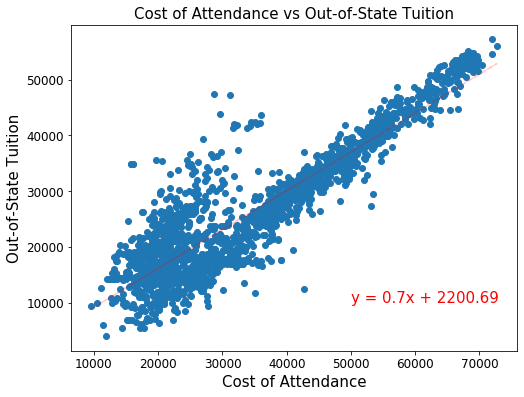

<Figure size 432x288 with 0 Axes>

In [25]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and Out-of-State Tuition
one_df = csc_data_final['Cost of Attendance']
two_df = csc_data_final['Out-of-State Tuition']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(one_df,two_df)
y = regress_values = one_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(one_df, two_df)
f1 = plt.plot(one_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('Out-of-State Tuition', size=15)
plt.title('Cost of Attendance vs Out-of-State Tuition', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and  Out-of-State Tuition is: {rvalue}")

plt.show()
plt.savefig('outputs/CostOfAttendanceVSInStateTuition.png')

0       30122.449345
1       13514.957116
2       24855.897860
3       13351.553566
4        9876.933142
            ...     
1743    32787.396000
1744    47987.598107
1745    36892.680686
1746    16205.607700
1747     8660.586495
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.92x + -9345.93
The correlation between Cost of Attendance and  In-State Tuition is: 0.9816713138974049


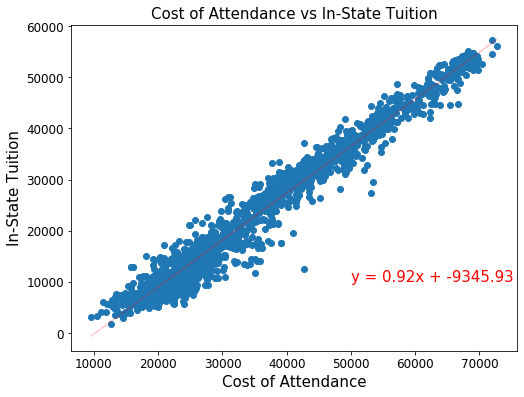

<Figure size 432x288 with 0 Axes>

In [23]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and In-State Tuition
one1_df = csc_data_final['Cost of Attendance']
two1_df = csc_data_final['In-State Tuition']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(one1_df,two1_df)
y1 = regress_values = one1_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
f2 = plt.scatter(one1_df, two1_df)
plt.plot(one1_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('In-State Tuition', size=15)
plt.title('Cost of Attendance vs In-State Tuition', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and  In-State Tuition is: {rvalue}")

plt.show()
plt.savefig('outputs/CostOfAttendanceVSOutofStateTuition.png')

 The resulting data frame consists of 1747 observations. As seen from the scatterplot, a school’s Cost of Attendance is positively associated with its In-State Tuition and Out-of-State Tuition. This is consistent with what we hypothesized since it’s well understood that an increase of the Cost of Atttendace will generate an increase of the tuition as well.  The hight r-squarred of 0.89( and 0.98 respectivley for In State Tuition) confirm that this relationship has a significant correlation. The coefficients we obtained from this simple linear regression analysis using statsmodels package tell us that an increase of 10 000 points  in Cost of Attendance is associated with an increase in tuition by around 10 000 points as well.

0       17466.938513
1       14952.280902
2       16669.492782
3       14927.538817
4       14401.422015
            ...     
1743    17870.456895
1744    20172.026777
1745    18492.067024
1746    15359.691297
1747    14217.246384
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.14x + 11490.75


TypeError: 'AxesSubplot' object does not support indexing

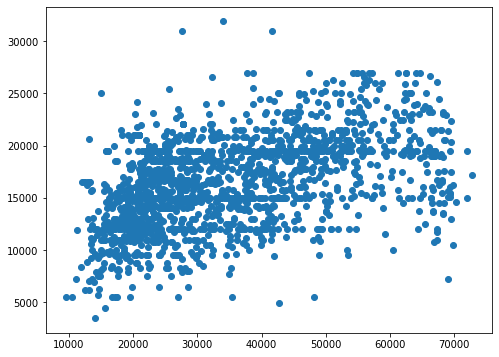

In [26]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and Median Debt with income greater than 75k
one3_df = csc_data_final['Cost of Attendance']
two3_df = csc_data_final['Median Debt with income greater than 75k']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(one3_df,two3_df)
y3 = regress_values = one3_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(one3_df, two3_df)
f3 = plt.plot(one3_df, regress_values, 'r--', alpha=0.2, ax=ax[0][0])

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('Median Debt with income greater than 75k', size=15)
plt.title('Cost of Attendance vs Median Debt with income greater than 75k', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and  Median Debt with income greater than 75k is: {rvalue}")

plt.show()
plt.savefig('outputs/CostofAttendanceVSMedianDebtwithIncomeGreaterThan75k.png')

### I was interested to analyse this relation because I was thinking that an increase in the Cost of Attendance will be easier for the upper class to pay this cost.
### The low p-value confirms that this relationship is statistically significant

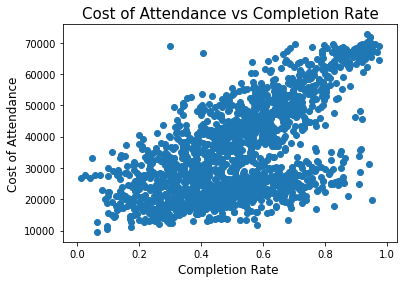

<Figure size 432x288 with 0 Axes>

In [31]:
one4_df = csc_data_final['Completion Rate']
two4_df = csc_data_final['Cost of Attendance']

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(one4_df, two4_df )
ax.set_xlabel('Completion Rate ',fontsize=12)
ax.set_ylabel('Cost of Attendance',fontsize=12)
ax.set_title("Cost of Attendance vs Completion Rate",fontsize=15);
plt.show()
plt.savefig('outputs/CostofAttendanceVSCompletionRate.png')

In [30]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and Out-of-State Tuition
one_df = csc_data_final['Cost of Attendance']
two_df = csc_data_final['Completion Rate']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(one_df,two_df)
y = regress_values = one_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(one_df, two_df)
f1 = plt.plot(one_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('Out-of-State Tuition', size=15)
plt.title('Cost of Attendance vs Out-of-State Tuition', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and  Out-of-State Tuition is: {rvalue}")

plt.show()
plt.savefig('outputs/CostOfAttendanceVSInStateTuition.png')

0       0.581555
1       0.436739
2       0.535631
3       0.435315
4       0.405016
          ...   
1743    0.604793
1744    0.737337
1745    0.640591
1746    0.460202
1747    0.394410
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.0x + 0.24
The correlation between Cost of Attendance and  Out-of-State Tuition is: 0.6018209600689016


ValueError: Image size of 505x3015541 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x432 with 1 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns

TypeError: 'AxesSubplot' object does not support indexing

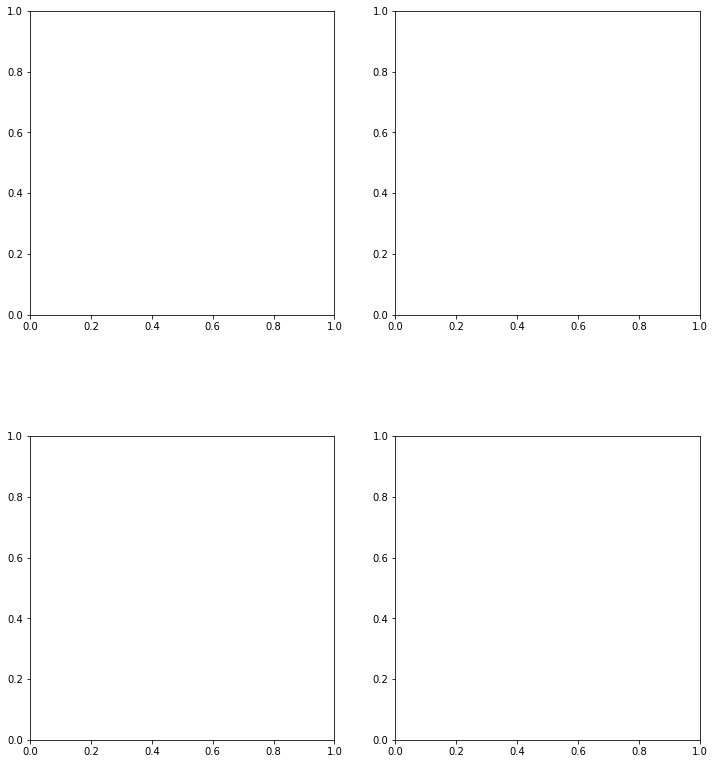

In [28]:
fig = plt.subplots(2,2,figsize=(12,15))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

#plt.subplot(2, 2, 1)
plt.plot(y,one_df, ax=ax[0][0])

#plt.subplot(2, 2, 2)
plt.plot(y1,one1_df,ax=ax[0][1])

#plt.subplot(2, 2, 3)
plt.plot(y3, one3_df,ax=ax[1][0])

#plt.subplot(2, 2, 4)
plt.plot(one4_df,two4_df, ax=ax[1][1])

plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')


The correlation between Cost of Attendance and Completion Rate is: 0.602
 y = 0.0x + 0.24
The coefficients we obtained from this simple linear regression analysis using statsmodels package tell us that an increase of 10 percent in completion rate is associated with a increase in Cost of Attendance rate by around 10000 point of value. On the graph we can remarque 2 distinctive groups of dots. 

# Conclusion:

 Today’s Americans are more educated than ever before, but the sticker shock is causing some whiplash. This overall trend of spiraling student debt has significant implications on a person’s life trajectory. With many graduates unable to repay their loans on time, more of them are delaying major life milestones, such as starting a family or becoming a homeowner.

### Ana's Code - End

----------------------------------------------

### Vikash's Code - Start

### Vikash's Code - End